In [2]:
import os
import csv
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# Import API key
#from api_keys import api_key

In [3]:
file_to_load = "Resources/traffic_collision_LA.csv"
collision_df = pd.read_csv(file_to_load, delimiter=',', encoding="utf-8")
collision_df["Victim Age"].head()

0    55.0
1    60.0
2    50.0
3    40.0
4    28.0
Name: Victim Age, dtype: float64

In [5]:
collision_df['Date Reported'] = pd.to_datetime(collision_df['Date Reported']).dt.year # to take the year
collision_df['Date Occurred'] = pd.to_datetime(collision_df['Date Occurred']).dt.year
collision_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,190817451,2019,2019,1230,8,West LA,841,997,TRAFFIC COLLISION,NaN,...,STREET,SALTAIR AV,RHODE ISLAND ST,"{'latitude': '34.0433', 'human_address': '{""ad...",23443.0,862.0,1519.0,9.0,10.0,50.0
1,191519526,2019,2019,1310,15,N Hollywood,1554,997,TRAFFIC COLLISION,NaN,...,STREET,CULVER BL,MARINA,"{'latitude': '33.9821', 'human_address': '{""ad...",24031.0,919.0,240.0,10.0,10.0,85.0
2,192019001,2019,2019,900,20,Olympic,2042,997,TRAFFIC COLLISION,NaN,...,STREET,9TH ST,WILTON PL,"{'latitude': '34.0559', 'human_address': '{""ad...",22722.0,611.0,888.0,NaN,7.0,86.0
3,191615731,2019,2019,30,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,...,STREET,VINELAND AV,CANTARA ST,"{'latitude': '34.2193', 'human_address': '{""ad...",19335.0,166.0,272.0,NaN,3.0,21.0
4,190918910,2019,2019,130,9,Van Nuys,914,997,TRAFFIC COLLISION,NaN,...,STREET,ENADIA WY,NATICK AV,"{'latitude': '34.2002', 'human_address': '{""ad...",19733.0,229.0,288.0,NaN,3.0,18.0


Accident Prone locations

•	Determine which area has the most amount of collisions

•   77th Street has a total of 31,404 collisions within 2010 to 2019

•   Southwest has a total of 29,156 collisions within 2010 to 2019


In [6]:
location = collision_df['Area Name'].value_counts()

location 


77th Street    31404
Southwest      29156
Wilshire       28547
West LA        26936
N Hollywood    26509
Olympic        26407
Pacific        26311
Van Nuys       25195
Newton         24774
Devonshire     24483
Hollywood      24336
West Valley    24153
Northeast      22754
Mission        21724
Topanga        21675
Central        20235
Southeast      20174
Rampart        18759
Harbor         18581
Hollenbeck     18063
Foothill       17291
Name: Area Name, dtype: int64

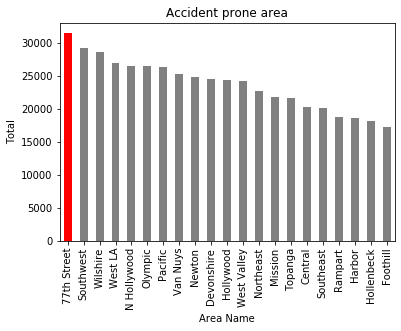

In [7]:
lst = ["#808080"] * 20
Location_chart = location.plot(kind="bar", title="Accident prone area", color = ['#ff0000'] + lst)
Location_chart.set_xlabel("Area Name")
Location_chart.set_ylabel("Total")

plt.savefig("Images/location.png")

Gender Demographic

•	Count of Male drivers
•	Count of Female drivers
•	Count of Unknown gender drivers

Determine which gender caused the most amount of collisions



In [8]:
#Gender loop  
count_F=0
count_M=0
Total=collision_df['Victim Sex'].count()
for gender in collision_df['Victim Sex']:
    if gender=="F":
        count_F=count_F+1
    elif gender=="M":
        count_M=count_M+1
Others=Total-(count_F+count_M)


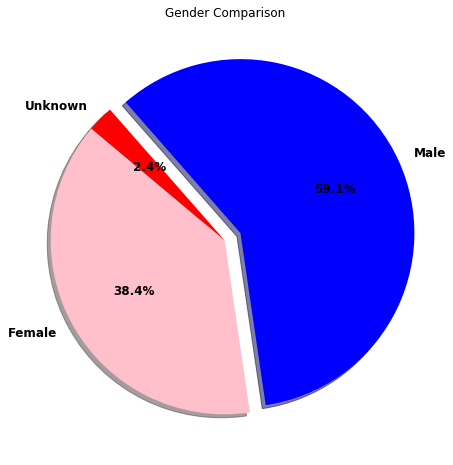

In [15]:

plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(10,8))

sizes=[count_F,count_M,Others]
labels=["Female", "Male", "Unknown"]
colors=["pink", "blue", "red"]
explode=(0,0.1,0)
piechart = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140,)
for txt in piechart[2]:
    txt.set_fontsize(12)
for txt in piechart[1]:
    txt.set_fontsize(12)

plt.title("Gender Comparison")

plt.savefig("Images/gender.png")




